In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from matplotlib import pyplot
import pylab as py

import warnings 
warnings.filterwarnings("ignore") 

In [2]:
# Converting the txt file to csv file

df = pd.read_csv(r'delhivery_data.txt')
df.to_csv (r'delhivery.csv', index=None)

In [3]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [4]:
df.shape

(144867, 24)

In [5]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

## 1> Basic data cleaning and exploration:
    a. Handle missing values in the data.
    b. Analyze the structure of the data.
    c. Try merging the rows using the hint mentioned above.

#### 1.a. Analyze the structure of the data.

In [7]:
# Count the number of null values in each columns

df.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

Inference: You can observe that source_name & destination_name has 293 & 261 null values respectively.

In [8]:
df.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


Inference: You can observe the mean and median in each column, very column has a huge difference in median and mean. That means, there are lot of outliers in every columns.

In [9]:
from numpy import NaN, NAN, nan

pd.isnull(nan)

True

In [10]:
df['source_name'].value_counts(dropna = False)

Gurgaon_Bilaspur_HB (Haryana)            23347
Bangalore_Nelmngla_H (Karnataka)          9975
Bhiwandi_Mankoli_HB (Maharashtra)         9088
Pune_Tathawde_H (Maharashtra)             4061
Hyderabad_Shamshbd_H (Telangana)          3340
                                         ...  
Shahjhnpur_NavdaCln_D (Uttar Pradesh)        1
Soro_UttarDPP_D (Orissa)                     1
Kayamkulam_Bhrnikvu_D (Kerala)               1
Krishnanagar_AnadiDPP_D (West Bengal)        1
Faridabad_Old (Haryana)                      1
Name: source_name, Length: 1499, dtype: int64

In [11]:
u = df['source_name'].unique()
u

array(['Anand_VUNagar_DC (Gujarat)', 'Khambhat_MotvdDPP_D (Gujarat)',
       'Bhiwandi_Mankoli_HB (Maharashtra)', ...,
       'Dwarka_StnRoad_DC (Gujarat)', 'Bengaluru_Nelmngla_L (Karnataka)',
       'Kulithalai_AnnaNGR_D (Tamil Nadu)'], dtype=object)

In [12]:
len(u)

1499

In [13]:
df['source_name'].nunique(dropna=False)

1499

In [14]:
df['data'].value_counts()

training    104858
test         40009
Name: data, dtype: int64

In [15]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [16]:
df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:57:20,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:31:18,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:11:18,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 20:53:19,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630


#### 1.b. Handle missing values in the data.

In [17]:
# For this problem, I feel forward filling is the right choice.

df = df.fillna(method='ffill')
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [18]:
df.tail()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:57:20,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:31:18,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:11:18,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 20:53:19,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630
144866,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 16:24:28.436231,70.039010,426.0,95.0,88.7319,4.484211,268.0,9.0,8.8088,29.777778


In [19]:
df.isna().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
dtype: int64

Inference: Now you can see that there are no null values in any of the columns.

#### 1.c. Try merging the rows using the hint mentioned above.


In [20]:
# Cummulative variables: actual_time, osrm_time, osrm_distance  

df['segment_key'] = df['trip_uuid'] + df['source_center'] + df['destination_center']

segment_cols = ['segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance']

for col in segment_cols:
    df[col+'_sum'] = df.groupby('segment_key')[col].cumsum()
    
df[[col+'_sum' for col in segment_cols]]

,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,14.0,11.0,11.9653
1,24.0,20.0,21.7243
2,40.0,27.0,32.5395
3,61.0,39.0,45.5619
4,67.0,44.0,49.4772
...,...,...,...
144862,92.0,94.0,65.3487
144863,118.0,115.0,82.7212
144864,138.0,149.0,103.4265
144865,155.0,176.0,122.3150


In [21]:
create_segment_dict = {
    
    'data' : 'first',
    'trip_creation_time' : 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',
    
    'source_center' : 'first',
    'source_name' : 'first',
    
    'destination_center' : 'last',
    'destination_name' : 'last',
    
    'od_start_time': 'first',
    'od_end_time': 'first',
    'start_scan_to_end_scan': 'first',
    
    'actual_distance_to_destination': 'last',
    'actual_time': 'last',
    
    'osrm_time': 'last',
    'osrm_distance': 'last',
    
    'segment_actual_time_sum': 'last',
    'segment_osrm_time_sum': 'last',
    'segment_osrm_distance_sum': 'last'   
    
}

In [22]:
segment = df.groupby('segment_key').agg(create_segment_dict).reset_index()
segment = segment.sort_values(by=['segment_key','od_end_time'], ascending=True).reset_index()

In [23]:
segment

,index,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,...,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,0,trip-153671041653548748IND209304AAAIND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,...,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205
1,1,trip-153671041653548748IND462022AAAIND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,...,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528
2,2,trip-153671042288605164IND561203AABIND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,...,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995
3,3,trip-153671042288605164IND572101AAAIND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,...,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899
4,4,trip-153671043369099517IND000000ACBIND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,...,2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,231.0,317.7408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26363,26363,trip-153861115439069069IND628204AAAIND627657AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),IND627657AAA,...,2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.5213,49.0,42.0,42.1431
26364,26364,trip-153861115439069069IND628613AAAIND627005AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628613AAA,Peikulam_SriVnktpm_D (Tamil Nadu),IND627005AAA,...,2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,33.673835,90.0,48.0,40.6080,89.0,77.0,78.5869
26365,26365,trip-153861115439069069IND628801AAAIND628204AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628801AAA,Eral_Busstand_D (Tamil Nadu),IND628204AAA,...,2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,12.661945,30.0,14.0,16.0185,29.0,14.0,16.0184
26366,26366,trip-153861118270144424IND583119AAAIND583101AAA,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,...,2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,40.546740,233.0,42.0,52.5303,233.0,42.0,52.5303


In [24]:
segment[segment['trip_uuid'] == 'trip-153741093647649320']

,index,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,...,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
10374,10374,trip-153741093647649320IND388121AAAIND388620AAB,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,...,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,67.0,44.0,49.4772
10375,10375,trip-153741093647649320IND388620AABIND388320AAA,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,...,2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,43.595802,102.0,45.0,53.2334,100.0,44.0,53.2334


In [25]:
segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26368 entries, 0 to 26367
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           26368 non-null  int64  
 1   segment_key                     26368 non-null  object 
 2   data                            26368 non-null  object 
 3   trip_creation_time              26368 non-null  object 
 4   route_schedule_uuid             26368 non-null  object 
 5   route_type                      26368 non-null  object 
 6   trip_uuid                       26368 non-null  object 
 7   source_center                   26368 non-null  object 
 8   source_name                     26368 non-null  object 
 9   destination_center              26368 non-null  object 
 10  destination_name                26368 non-null  object 
 11  od_start_time                   26368 non-null  object 
 12  od_end_time                     

In [26]:
create_trip_dict = {
    
    'data' : 'first',
    'trip_creation_time' : 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',
    
    'source_center' : 'first',
    'source_name' : 'first',
    
    'destination_center' : 'last',
    'destination_name' : 'last',
    
    'od_start_time': 'sum',
    'od_end_time': 'sum',
    'start_scan_to_end_scan': 'sum',
    
    'actual_distance_to_destination': 'sum',
    'actual_time': 'sum',
    
    'osrm_time': 'sum',
    'osrm_distance': 'sum',
    
    'segment_actual_time_sum': 'sum',
    'segment_osrm_time_sum': 'sum',
    'segment_osrm_distance_sum': 'sum'   
    
}

In [27]:
trip = df.groupby('trip_uuid').agg(create_trip_dict).reset_index(drop=True)
trip

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.5357412018-09-12 00:00:16....,2018-09-12 16:39:46.8584692018-09-12 16:39:46....,43659.0,8860.812105,15682.0,7787.0,10577.7647,15516.0,10670.0,14222.1104
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.8864302018-09-12 00:00:22....,2018-09-12 02:03:09.6555912018-09-12 02:03:09....,906.0,240.208306,399.0,210.0,269.4308,396.0,199.0,268.5094
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-12 00:00:33.6912502018-09-12 00:00:33....,2018-09-14 03:40:17.1067332018-09-14 03:40:17....,248631.0,68163.502238,112225.0,65768.0,89447.2488,110876.0,70971.0,90479.7151
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.1137102018-09-12 00:01:00....,2018-09-12 01:41:29.8098222018-09-12 01:41:29....,200.0,28.529648,82.0,24.0,31.6475,82.0,25.0,31.8441
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-09-12 00:02:09.7407252018-09-12 00:02:09....,2018-09-12 02:34:10.5155932018-09-12 02:34:10....,1586.0,239.007304,556.0,207.0,266.2914,555.0,204.0,266.2915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,trip-153861095625827784,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-10-03 23:55:56.2585332018-10-03 23:55:56....,2018-10-04 02:28:43.5291412018-10-04 02:28:43....,876.0,141.057373,186.0,148.0,162.9473,184.0,148.0,154.3394
14813,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,trip-153861104386292051,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),2018-10-03 23:57:23.8631552018-10-03 23:57:23....,2018-10-04 00:57:59.2944342018-10-04 00:57:59....,120.0,25.130640,33.0,19.0,26.5333,33.0,18.0,26.5334
14814,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-10-03 23:57:44.4293242018-10-03 23:57:44....,2018-10-04 02:51:27.0757972018-10-04 02:51:27....,1263.0,93.743842,549.0,134.0,162.8499,548.0,202.0,249.4333
14815,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-03 23:59:14.3909542018-10-03 23:59:14....,2018-10-04 01:44:53.8080002018-10-04 01:44:53....,1315.0,355.281673,600.0,446.0,449.5383,592.0,497.0,520.5464


In [28]:
trip[trip['trip_uuid'] == 'trip-153741093647649320']

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
5919,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 03:21:32.4186002018-09-20 03:21:32....,2018-09-20 04:47:45.2367972018-09-20 04:47:45....,975.0,271.559234,510.0,284.0,335.6639,502.0,279.0,330.9229


In [29]:
trip[['actual_distance_to_destination', 'osrm_distance']]

,actual_distance_to_destination,osrm_distance
0,8860.812105,10577.7647
1,240.208306,269.4308
2,68163.502238,89447.2488
3,28.529648,31.6475
4,239.007304,266.2914
...,...,...
14812,141.057373,162.9473
14813,25.130640,26.5333
14814,93.743842,162.8499
14815,355.281673,449.5383


Recommendation: OSRM is predicting wrong distance. We can tell the team to work on OSRM machine.

## 2> Build some features to prepare the data for actual analysis. Extract features from the below fields:
    a. Destination Name: Split and extract features out of destination. City-place-code (State)
    b. Source Name: Split and extract features out of destination. City-place-code (State)
    c. Trip_creation_time: Extract features like month, year and day etc

#### 2.a. Destination Name: Split and extract features out of destination. City-place-code (State)
#### 2.b. Source Name: Split and extract features out of destination. City-place-code (State)

In [30]:
def city(a):
    m = a.split("_")
    try:
        return m[0]
    except:
        return ' '

def place(b):
    n = b.split("_")
    try:
        return n[1]
    except:
        return ' '
def code(c):
    o = c.split("_")
    try:
        return o[2]
    except:
        return o[-1]

In [31]:
trip['des_city'] = trip['destination_name'].apply(city)
trip['des_place'] = trip['destination_name'].apply(place)
trip['des_code'] = trip['destination_name'].apply(code)
trip['sor_city'] = trip['source_name'].apply(city)
trip['sor_place'] = trip['source_name'].apply(place)
trip['sor_code'] = trip['source_name'].apply(code)

In [32]:
trip.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,des_city,des_place,des_code,sor_city,sor_place,sor_code
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.5357412018-09-12 00:00:16....,...,10577.7647,15516.0,10670.0,14222.1104,Gurgaon,Bilaspur,HB (Haryana),Bhopal,Trnsport,H (Madhya Pradesh)
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.8864302018-09-12 00:00:22....,...,269.4308,396.0,199.0,268.5094,Chikblapur,ShntiSgr,D (Karnataka),Tumkur,Veersagr,I (Karnataka)
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-12 00:00:33.6912502018-09-12 00:00:33....,...,89447.2488,110876.0,70971.0,90479.7151,Chandigarh,Mehmdpur,H (Punjab),Bangalore,Nelmngla,H (Karnataka)
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.1137102018-09-12 00:01:00....,...,31.6475,82.0,25.0,31.8441,Mumbai,MiraRd,IP (Maharashtra),Mumbai Hub (Maharashtra),,Mumbai Hub (Maharashtra)
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-09-12 00:02:09.7407252018-09-12 00:02:09....,...,266.2914,555.0,204.0,266.2915,Bellary,Dc (Karnataka),Dc (Karnataka),Bellary,Dc (Karnataka),Dc (Karnataka)


#### 2.c. Trip_creation_time: Extract features like month, year and day etc

In [33]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14817 entries, 0 to 14816
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   data                            14817 non-null  object 
 1   trip_creation_time              14817 non-null  object 
 2   route_schedule_uuid             14817 non-null  object 
 3   route_type                      14817 non-null  object 
 4   trip_uuid                       14817 non-null  object 
 5   source_center                   14817 non-null  object 
 6   source_name                     14817 non-null  object 
 7   destination_center              14817 non-null  object 
 8   destination_name                14817 non-null  object 
 9   od_start_time                   14817 non-null  object 
 10  od_end_time                     14817 non-null  object 
 11  start_scan_to_end_scan          14817 non-null  float64
 12  actual_distance_to_destination  

In [34]:
# Above you can observe that 'trip_creation_time' is 'object' datatype. Lets convert it to datetime datatype.

trip['trip_creation_time'] = pd.to_datetime(trip['trip_creation_time'])   
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14817 entries, 0 to 14816
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   data                            14817 non-null  object        
 1   trip_creation_time              14817 non-null  datetime64[ns]
 2   route_schedule_uuid             14817 non-null  object        
 3   route_type                      14817 non-null  object        
 4   trip_uuid                       14817 non-null  object        
 5   source_center                   14817 non-null  object        
 6   source_name                     14817 non-null  object        
 7   destination_center              14817 non-null  object        
 8   destination_name                14817 non-null  object        
 9   od_start_time                   14817 non-null  object        
 10  od_end_time                     14817 non-null  object        
 11  st

In [35]:
ts = trip['trip_creation_time'][1]
ts

Timestamp('2018-09-12 00:00:22.886430')

In [36]:
trip['tc_year'] = trip['trip_creation_time'].dt.year
trip['tc_month'] = trip['trip_creation_time'].dt.month
trip['tc_day'] = trip['trip_creation_time'].dt.day

In [37]:
trip.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,segment_osrm_distance_sum,des_city,des_place,des_code,sor_city,sor_place,sor_code,tc_year,tc_month,tc_day
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.5357412018-09-12 00:00:16....,...,14222.1104,Gurgaon,Bilaspur,HB (Haryana),Bhopal,Trnsport,H (Madhya Pradesh),2018,9,12
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.8864302018-09-12 00:00:22....,...,268.5094,Chikblapur,ShntiSgr,D (Karnataka),Tumkur,Veersagr,I (Karnataka),2018,9,12
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-12 00:00:33.6912502018-09-12 00:00:33....,...,90479.7151,Chandigarh,Mehmdpur,H (Punjab),Bangalore,Nelmngla,H (Karnataka),2018,9,12
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.1137102018-09-12 00:01:00....,...,31.8441,Mumbai,MiraRd,IP (Maharashtra),Mumbai Hub (Maharashtra),,Mumbai Hub (Maharashtra),2018,9,12
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-09-12 00:02:09.7407252018-09-12 00:02:09....,...,266.2915,Bellary,Dc (Karnataka),Dc (Karnataka),Bellary,Dc (Karnataka),Dc (Karnataka),2018,9,12


## 3> In-depth analysis and feature engineering:
        a. Calculate the time taken between od_start_time and od_end_time and keep it as a feature. Drop the original columns, if required.
        b. Compare the difference between Point a. and start_scan_to_end_scan. Do hypothesis testing/ Visual analysis to check.
        c. Do hypothesis testing/ visual analysis between actual_time aggregated value and OSRM time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid).
        d. Do hypothesis testing/ visual analysis between actual_time aggregated value and segment actual time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid).
        e. Do hypothesis testing/ visual analysis between osrm distance aggregated value and segment osrm distance aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid).
        f. Do hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid).
        g. Find outliers in the numerical variables (you might find outliers in almost all the variables), and check it using visual analysis.
        h. Handle the outliers using the IQR method.
        i. Do one-hot encoding of categorical variables (like route_type).
        j. Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler.

#### 2.a. Calculate the time taken between od_start_time and od_end_time and keep it as a feature. Drop the original columns, if required.

In [41]:
trip['od_start_time'] = pd.to_datetime(trip['od_start_time'], utc=True)
trip['od_end_time'] = pd.to_datetime(trip['od_end_time'], utc=True)
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14817 entries, 0 to 14816
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype              
---  ------                          --------------  -----              
 0   data                            14817 non-null  object             
 1   trip_creation_time              14817 non-null  datetime64[ns]     
 2   route_schedule_uuid             14817 non-null  object             
 3   route_type                      14817 non-null  object             
 4   trip_uuid                       14817 non-null  object             
 5   source_center                   14817 non-null  object             
 6   source_name                     14817 non-null  object             
 7   destination_center              14817 non-null  object             
 8   destination_name                14817 non-null  object             
 9   od_start_time                   14817 non-null  datetime64[ns, UTC]
 10  od_end_tim

In [43]:
trip['od_time_diff'] = trip['od_end_time'] - trip['od_start_time']
trip['od_time_diff'] = trip['od_time_diff'].dt.total_seconds()/(60)
trip.iloc[:, 9:]

,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,des_city,des_place,des_code,sor_city,sor_place,sor_code,tc_year,tc_month,tc_day,od_time_diff
0,2018-09-13 04:39:46.858469+00:00,2018-09-13 02:40:23.123744+00:00,43659.0,8860.812105,15682.0,7787.0,10577.7647,15516.0,10670.0,14222.1104,Gurgaon,Bilaspur,HB (Haryana),Bhopal,Trnsport,H (Madhya Pradesh),2018,9,12,-119.395579
1,2018-09-12 14:03:09.655591+00:00,2018-09-12 15:01:59.598855+00:00,906.0,240.208306,399.0,210.0,269.4308,396.0,199.0,268.5094,Chikblapur,ShntiSgr,D (Karnataka),Tumkur,Veersagr,I (Karnataka),2018,9,12,58.832388
2,2018-09-12 17:40:17.106733+00:00,2018-09-15 07:34:55.442454+00:00,248631.0,68163.502238,112225.0,65768.0,89447.2488,110876.0,70971.0,90479.7151,Chandigarh,Mehmdpur,H (Punjab),Bangalore,Nelmngla,H (Karnataka),2018,9,12,3714.638929
3,2018-09-12 12:01:00.113710+00:00,2018-09-12 13:41:29.809822+00:00,200.0,28.529648,82.0,24.0,31.6475,82.0,25.0,31.8441,Mumbai,MiraRd,IP (Maharashtra),Mumbai Hub (Maharashtra),,Mumbai Hub (Maharashtra),2018,9,12,100.494935
4,2018-09-12 15:54:43.114421+00:00,2018-09-13 00:00:30.683231+00:00,1586.0,239.007304,556.0,207.0,266.2914,555.0,204.0,266.2915,Bellary,Dc (Karnataka),Dc (Karnataka),Bellary,Dc (Karnataka),Dc (Karnataka),2018,9,12,485.792814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,2018-10-03 08:56:10.943956+00:00,2018-10-04 10:41:25.409035+00:00,876.0,141.057373,186.0,148.0,162.9473,184.0,148.0,154.3394,Chandigarh,Mehmdpur,H (Punjab),Chandigarh,Mehmdpur,H (Punjab),2018,10,3,1545.241085
14813,2018-10-04 02:57:23.863155+00:00,2018-10-04 04:57:59.294434+00:00,120.0,25.130640,33.0,19.0,26.5333,33.0,18.0,26.5334,Faridabad,Blbgarh,DC (Haryana),FBD,Balabhgarh,DPC (Haryana),2018,10,3,120.590521
14814,2018-10-03 06:51:27.075797+00:00,2018-10-04 10:59:51.621332+00:00,1263.0,93.743842,549.0,134.0,162.8499,548.0,202.0,249.4333,Kanpur,Central,H,Kanpur,Central,H,2018,10,3,1688.409092
14815,2018-10-03 08:16:39.894872+00:00,2018-10-04 09:47:45.162682+00:00,1315.0,355.281673,600.0,446.0,449.5383,592.0,497.0,520.5464,Tirunelveli,VdkkuSrt,I (Tamil Nadu),Tirunelveli,VdkkuSrt,I (Tamil Nadu),2018,10,3,1531.087797


In [44]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14817 entries, 0 to 14816
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype              
---  ------                          --------------  -----              
 0   data                            14817 non-null  object             
 1   trip_creation_time              14817 non-null  datetime64[ns]     
 2   route_schedule_uuid             14817 non-null  object             
 3   route_type                      14817 non-null  object             
 4   trip_uuid                       14817 non-null  object             
 5   source_center                   14817 non-null  object             
 6   source_name                     14817 non-null  object             
 7   destination_center              14817 non-null  object             
 8   destination_name                14817 non-null  object             
 9   od_start_time                   14817 non-null  datetime64[ns, UTC]
 10  od_end_tim

#### 2.g. Find outliers in the numerical variables (you might find outliers in almost all the variables), and check it using visual analysis.

In [45]:
from pandas.api.types import is_numeric_dtype
numerical_cols = []
for col in trip.columns:
    if is_numeric_dtype(trip[col].dtype):
        numerical_cols.append(col)

In [46]:
numerical_cols

['start_scan_to_end_scan',
 'actual_distance_to_destination',
 'actual_time',
 'osrm_time',
 'osrm_distance',
 'segment_actual_time_sum',
 'segment_osrm_time_sum',
 'segment_osrm_distance_sum',
 'tc_year',
 'tc_month',
 'tc_day',
 'od_time_diff']

In [47]:
numerical_cols = ['start_scan_to_end_scan',
 'actual_distance_to_destination',
 'actual_time',
 'osrm_time',
 'osrm_distance',
 'segment_actual_time_sum',
 'segment_osrm_time_sum',
 'segment_osrm_distance_sum',
 'od_time_diff']

In [48]:
numerical_cols

['start_scan_to_end_scan',
 'actual_distance_to_destination',
 'actual_time',
 'osrm_time',
 'osrm_distance',
 'segment_actual_time_sum',
 'segment_osrm_time_sum',
 'segment_osrm_distance_sum',
 'od_time_diff']

<AxesSubplot:>

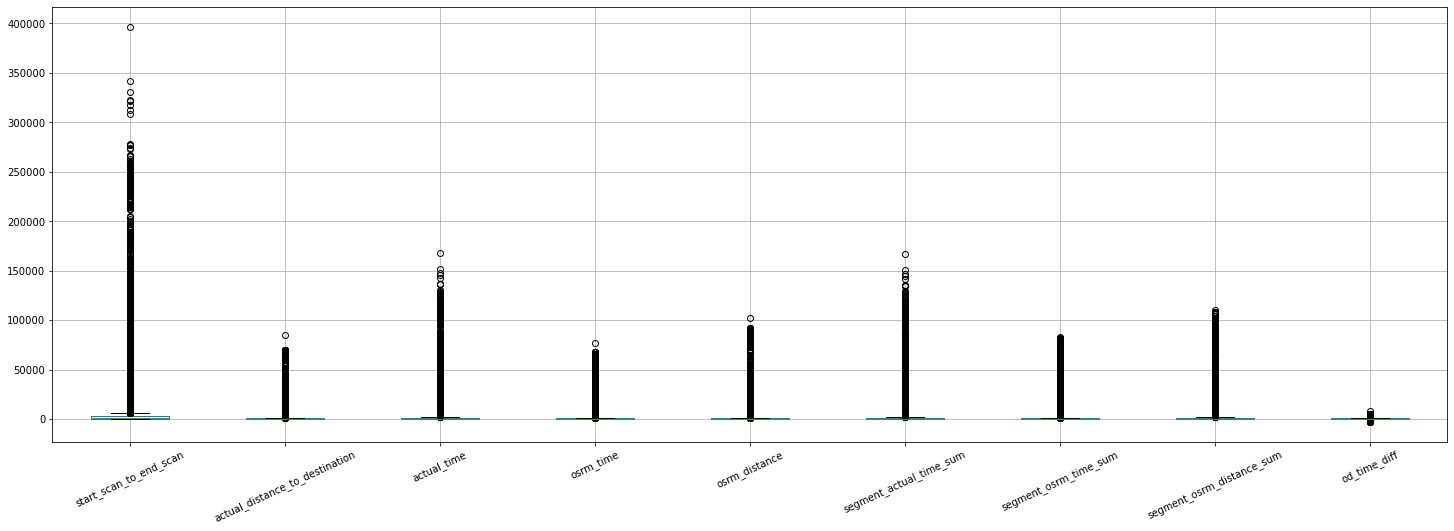

In [49]:
trip[numerical_cols].boxplot(rot=25, figsize=(25,8))

#### 2.h. Handle the outliers using the IQR method.

In [50]:
Q1 = trip[numerical_cols].quantile(0.25)
Q3 = trip[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

start_scan_to_end_scan            2418.000000
actual_distance_to_destination     414.359022
actual_time                        921.000000
osrm_time                          454.000000
osrm_distance                      541.938800
segment_actual_time_sum            912.000000
segment_osrm_time_sum              491.000000
segment_osrm_distance_sum          568.307800
od_time_diff                       446.872346
dtype: float64


In [51]:
print(trip[numerical_cols] < (Q1 - 1.5 * IQR)) or (trip[numerical_cols] > (Q3 + 1.5 * IQR))

       start_scan_to_end_scan  actual_distance_to_destination  actual_time  \
0                       False                           False        False   
1                       False                           False        False   
2                       False                           False        False   
3                       False                           False        False   
4                       False                           False        False   
...                       ...                             ...          ...   
14812                   False                           False        False   
14813                   False                           False        False   
14814                   False                           False        False   
14815                   False                           False        False   
14816                   False                           False        False   

       osrm_time  osrm_distance  segment_actual_time_sum  \
0  

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,od_time_diff
0,True,True,True,True,True,True,True,True,False
1,False,False,False,False,False,False,False,False,False
2,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
14812,False,False,False,False,False,False,False,False,True
14813,False,False,False,False,False,False,False,False,False
14814,False,False,False,False,False,False,False,False,True
14815,False,False,False,False,False,False,False,False,True


In [52]:
trip = trip[~((trip[numerical_cols] < (Q1 - 1.5 * IQR)) |(trip[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [53]:
trip = trip.reset_index(drop=True)

In [54]:
trip.iloc[5:10, 9:]

,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,des_city,des_place,des_code,sor_city,sor_place,sor_code,tc_year,tc_month,tc_day,od_time_diff
5,2018-09-12 13:42:40.156332+00:00,2018-09-12 15:00:55.163423+00:00,292.0,41.834857,122.0,65.0,54.2978,122.0,65.0,54.2978,HBR Layout PC (Karnataka),,HBR Layout PC (Karnataka),HBR Layout PC (Karnataka),,HBR Layout PC (Karnataka),2018,9,12,78.250118
6,2018-09-12 14:31:39.246238+00:00,2018-09-12 17:16:28.581141+00:00,560.0,44.084712,306.0,50.0,53.8577,306.0,50.0,53.8576,Surat,Central,I,Surat,Central,I,2018,9,12,164.822248
7,2018-09-12 12:06:39.565253+00:00,2018-09-12 12:55:59.568645+00:00,98.0,19.282605,35.0,16.0,19.9606,35.0,22.0,26.0900,Delhi,Bhogal (Delhi),Bhogal (Delhi),Delhi,Lajpat,IP (Delhi),2018,9,12,49.333390
8,2018-09-12 14:17:04.815916+00:00,2018-09-12 15:30:02.142126+00:00,144.0,23.496706,94.0,28.0,30.8130,94.0,28.0,30.8131,PNQ Rahatani DPC (Maharashtra),,PNQ Rahatani DPC (Maharashtra),Pune,North,D,2018,9,12,72.955437
9,2018-09-12 00:11:40.783923+00:00,2018-09-12 00:50:10.814399+00:00,38.0,9.396526,17.0,9.0,10.8159,17.0,9.0,10.8159,Faridabad (Haryana),,Faridabad (Haryana),FBD,Balabhgarh,DPC (Haryana),2018,9,12,38.500508


<AxesSubplot:>

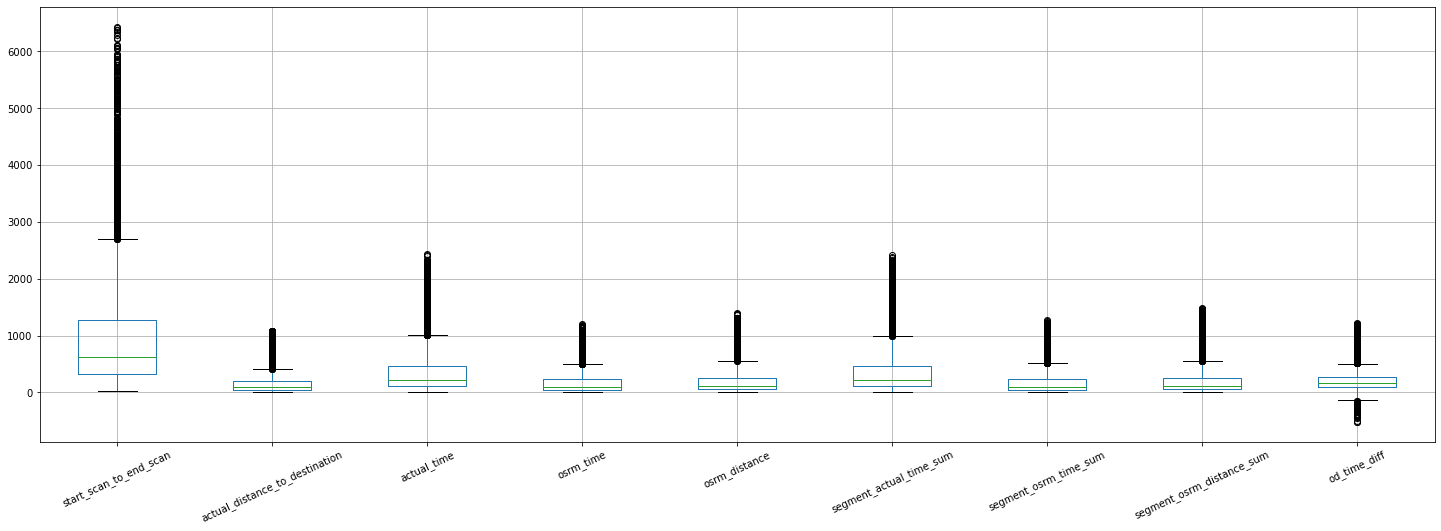

In [55]:
trip[numerical_cols].boxplot(rot=25, figsize=(25,8))

In [56]:
trip.iloc[:,9:]

,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,des_city,des_place,des_code,sor_city,sor_place,sor_code,tc_year,tc_month,tc_day,od_time_diff
0,2018-09-12 14:03:09.655591+00:00,2018-09-12 15:01:59.598855+00:00,906.0,240.208306,399.0,210.0,269.4308,396.0,199.0,268.5094,Chikblapur,ShntiSgr,D (Karnataka),Tumkur,Veersagr,I (Karnataka),2018,9,12,58.832388
1,2018-09-12 12:01:00.113710+00:00,2018-09-12 13:41:29.809822+00:00,200.0,28.529648,82.0,24.0,31.6475,82.0,25.0,31.8441,Mumbai,MiraRd,IP (Maharashtra),Mumbai Hub (Maharashtra),,Mumbai Hub (Maharashtra),2018,9,12,100.494935
2,2018-09-12 15:54:43.114421+00:00,2018-09-13 00:00:30.683231+00:00,1586.0,239.007304,556.0,207.0,266.2914,555.0,204.0,266.2915,Bellary,Dc (Karnataka),Dc (Karnataka),Bellary,Dc (Karnataka),Dc (Karnataka),2018,9,12,485.792814
3,2018-09-12 14:12:10.755603+00:00,2018-09-12 15:13:03.432532+00:00,249.0,34.407865,92.0,30.0,38.1953,91.0,30.0,38.1953,Chennai,Sriperumbudur,Dc (Tamil Nadu),Chennai,Porur,DPC (Tamil Nadu),2018,9,12,60.877949
4,2018-09-12 00:04:22.011653+00:00,2018-09-12 01:42:22.349694+00:00,98.0,9.100510,24.0,13.0,12.0184,24.0,13.0,12.0184,Chennai,Vandalur,Dc (Tamil Nadu),Chennai,Chrompet,DPC (Tamil Nadu),2018,9,12,98.005634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10565,2018-10-04 02:54:54.039992+00:00,2018-10-04 05:33:37.635402+00:00,392.0,90.697787,144.0,113.0,143.5996,141.0,125.0,157.2296,Anand,Vaghasi,IP (Gujarat),Vadodara,Karelibaug,DPC (Gujarat),2018,10,3,158.726590
10566,2018-10-04 06:09:14.276831+00:00,2018-10-04 07:07:24.591271+00:00,116.0,24.811909,69.0,19.0,25.8264,68.0,18.0,25.8264,Chennai,Sriperumbudur,Dc (Tamil Nadu),Chennai,Poonamallee (Tamil Nadu),Poonamallee (Tamil Nadu),2018,10,3,58.171907
10567,2018-10-04 02:55:18.430664+00:00,2018-10-04 05:23:31.389882+00:00,176.0,27.866212,57.0,24.0,31.2345,56.0,24.0,31.2345,Mumbai,MiraRd,IP (Maharashtra),Mumbai Hub (Maharashtra),,Mumbai Hub (Maharashtra),2018,10,3,148.215987
10568,2018-10-04 02:57:23.863155+00:00,2018-10-04 04:57:59.294434+00:00,120.0,25.130640,33.0,19.0,26.5333,33.0,18.0,26.5334,Faridabad,Blbgarh,DC (Haryana),FBD,Balabhgarh,DPC (Haryana),2018,10,3,120.590521


#### 2.i. Do one-hot encoding of categorical variables (like route_type)

In [57]:
trip['route_type'].unique()

array(['Carting', 'FTL'], dtype=object)

In [58]:
trip['route_type'].value_counts()

Carting    8070
FTL        2500
Name: route_type, dtype: int64

In [59]:
trip = pd.get_dummies(trip, columns = ['route_type'])
trip

,data,trip_creation_time,route_schedule_uuid,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,...,des_code,sor_city,sor_place,sor_code,tc_year,tc_month,tc_day,od_time_diff,route_type_Carting,route_type_FTL
0,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 14:03:09.655591+00:00,2018-09-12 15:01:59.598855+00:00,...,D (Karnataka),Tumkur,Veersagr,I (Karnataka),2018,9,12,58.832388,1,0
1,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 12:01:00.113710+00:00,2018-09-12 13:41:29.809822+00:00,...,IP (Maharashtra),Mumbai Hub (Maharashtra),,Mumbai Hub (Maharashtra),2018,9,12,100.494935,1,0
2,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-09-12 15:54:43.114421+00:00,2018-09-13 00:00:30.683231+00:00,...,Dc (Karnataka),Bellary,Dc (Karnataka),Dc (Karnataka),2018,9,12,485.792814,0,1
3,training,2018-09-12 00:02:34.161600,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,trip-153671055416136166,IND600116AAB,Chennai_Porur_DPC (Tamil Nadu),IND602105AAB,Chennai_Sriperumbudur_Dc (Tamil Nadu),2018-09-12 14:12:10.755603+00:00,2018-09-12 15:13:03.432532+00:00,...,Dc (Tamil Nadu),Chennai,Porur,DPC (Tamil Nadu),2018,9,12,60.877949,1,0
4,training,2018-09-12 00:04:22.011653,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,trip-153671066201138152,IND600044AAD,Chennai_Chrompet_DPC (Tamil Nadu),IND600048AAA,Chennai_Vandalur_Dc (Tamil Nadu),2018-09-12 00:04:22.011653+00:00,2018-09-12 01:42:22.349694+00:00,...,Dc (Tamil Nadu),Chennai,Chrompet,DPC (Tamil Nadu),2018,9,12,98.005634,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10565,test,2018-10-03 23:54:54.039992,thanos::sroute:233c5ce2-a1e2-4550-945c-28c357c...,trip-153861089403973335,IND390022AAA,Vadodara_Karelibaug_DPC (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-10-04 02:54:54.039992+00:00,2018-10-04 05:33:37.635402+00:00,...,IP (Gujarat),Vadodara,Karelibaug,DPC (Gujarat),2018,10,3,158.726590,1,0
10566,test,2018-10-03 23:55:01.637939,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,trip-153861090163768194,IND600056AAA,Chennai_Poonamallee (Tamil Nadu),IND602105AAB,Chennai_Sriperumbudur_Dc (Tamil Nadu),2018-10-04 06:09:14.276831+00:00,2018-10-04 07:07:24.591271+00:00,...,Dc (Tamil Nadu),Chennai,Poonamallee (Tamil Nadu),Poonamallee (Tamil Nadu),2018,10,3,58.171907,1,0
10567,test,2018-10-03 23:55:18.430664,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,trip-153861091843037040,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-10-04 02:55:18.430664+00:00,2018-10-04 05:23:31.389882+00:00,...,IP (Maharashtra),Mumbai Hub (Maharashtra),,Mumbai Hub (Maharashtra),2018,10,3,148.215987,1,0
10568,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,trip-153861104386292051,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),2018-10-04 02:57:23.863155+00:00,2018-10-04 04:57:59.294434+00:00,...,DC (Haryana),FBD,Balabhgarh,DPC (Haryana),2018,10,3,120.590521,1,0


#### 2.j. Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler.

In [60]:
# StandardScaler

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
scaler = StandardScaler()
scaler.fit(trip[numerical_cols])

StandardScaler()

In [63]:
trip[numerical_cols] = scaler.transform(trip[numerical_cols])

In [64]:
trip[numerical_cols]

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,od_time_diff
0,-0.086920,0.427751,0.074806,0.179972,0.294477,0.075873,0.033878,0.226280,-0.918164
1,-0.766343,-0.675358,-0.728837,-0.783608,-0.716530,-0.726752,-0.747176,-0.711391,-0.658848
2,0.567482,0.421492,0.472824,0.164430,0.281129,0.482298,0.056322,0.217493,1.739316
3,-0.719187,-0.644726,-0.703485,-0.752525,-0.688690,-0.703747,-0.724732,-0.686228,-0.905432
4,-0.864503,-0.776608,-0.875875,-0.840594,-0.799989,-0.875008,-0.801042,-0.789941,-0.674342
...,...,...,...,...,...,...,...,...,...
10565,-0.581570,-0.351385,-0.571657,-0.322540,-0.240532,-0.575941,-0.298295,-0.214612,-0.296404
10566,-0.847180,-0.694732,-0.761794,-0.809511,-0.741280,-0.762538,-0.778598,-0.735233,-0.922275
10567,-0.789439,-0.678816,-0.792215,-0.783608,-0.718286,-0.793212,-0.751665,-0.713806,-0.361824
10568,-0.843331,-0.693071,-0.853059,-0.809511,-0.738274,-0.852003,-0.778598,-0.732432,-0.533770


In [65]:
trip[numerical_cols].describe()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,od_time_diff
count,1.057000e+04,1.057000e+04,1.057000e+04,1.057000e+04,1.057000e+04,1.057000e+04,1.057000e+04,1.057000e+04,1.057000e+04
mean,-1.669011e-16,8.746814e-18,4.219858e-17,-1.689493e-17,2.942564e-17,-1.884727e-17,-1.686814e-16,8.852374e-17,-4.071168e-17
std,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00
min,-9.337924e-01,-7.771193e-01,-9.139027e-01,-8.768580e-01,-8.125125e-01,-9.133501e-01,-8.324634e-01,-8.016111e-01,-4.522192e+00
25%,-6.556718e-01,-6.012275e-01,-6.527822e-01,-6.592753e-01,-6.145848e-01,-6.551807e-01,-6.439332e-01,-6.123091e-01,-6.539906e-01
50%,-3.621534e-01,-3.792705e-01,-3.954645e-01,-3.898873e-01,-3.987964e-01,-3.970114e-01,-4.015373e-01,-4.028451e-01,-2.501621e-01
75%,2.640992e-01,1.815260e-01,2.548015e-01,2.835828e-01,2.426803e-01,2.522463e-01,1.909861e-01,1.818842e-01,3.578704e-01
max,5.234904e+00,4.816376e+00,5.218625e+00,5.277623e+00,5.061921e+00,5.234148e+00,4.818953e+00,5.028548e+00,6.336830e+00


In [66]:
trip.iloc[:, 9:]

,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,des_city,...,des_code,sor_city,sor_place,sor_code,tc_year,tc_month,tc_day,od_time_diff,route_type_Carting,route_type_FTL
0,2018-09-12 15:01:59.598855+00:00,-0.086920,0.427751,0.074806,0.179972,0.294477,0.075873,0.033878,0.226280,Chikblapur,...,D (Karnataka),Tumkur,Veersagr,I (Karnataka),2018,9,12,-0.918164,1,0
1,2018-09-12 13:41:29.809822+00:00,-0.766343,-0.675358,-0.728837,-0.783608,-0.716530,-0.726752,-0.747176,-0.711391,Mumbai,...,IP (Maharashtra),Mumbai Hub (Maharashtra),,Mumbai Hub (Maharashtra),2018,9,12,-0.658848,1,0
2,2018-09-13 00:00:30.683231+00:00,0.567482,0.421492,0.472824,0.164430,0.281129,0.482298,0.056322,0.217493,Bellary,...,Dc (Karnataka),Bellary,Dc (Karnataka),Dc (Karnataka),2018,9,12,1.739316,0,1
3,2018-09-12 15:13:03.432532+00:00,-0.719187,-0.644726,-0.703485,-0.752525,-0.688690,-0.703747,-0.724732,-0.686228,Chennai,...,Dc (Tamil Nadu),Chennai,Porur,DPC (Tamil Nadu),2018,9,12,-0.905432,1,0
4,2018-09-12 01:42:22.349694+00:00,-0.864503,-0.776608,-0.875875,-0.840594,-0.799989,-0.875008,-0.801042,-0.789941,Chennai,...,Dc (Tamil Nadu),Chennai,Chrompet,DPC (Tamil Nadu),2018,9,12,-0.674342,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10565,2018-10-04 05:33:37.635402+00:00,-0.581570,-0.351385,-0.571657,-0.322540,-0.240532,-0.575941,-0.298295,-0.214612,Anand,...,IP (Gujarat),Vadodara,Karelibaug,DPC (Gujarat),2018,10,3,-0.296404,1,0
10566,2018-10-04 07:07:24.591271+00:00,-0.847180,-0.694732,-0.761794,-0.809511,-0.741280,-0.762538,-0.778598,-0.735233,Chennai,...,Dc (Tamil Nadu),Chennai,Poonamallee (Tamil Nadu),Poonamallee (Tamil Nadu),2018,10,3,-0.922275,1,0
10567,2018-10-04 05:23:31.389882+00:00,-0.789439,-0.678816,-0.792215,-0.783608,-0.718286,-0.793212,-0.751665,-0.713806,Mumbai,...,IP (Maharashtra),Mumbai Hub (Maharashtra),,Mumbai Hub (Maharashtra),2018,10,3,-0.361824,1,0
10568,2018-10-04 04:57:59.294434+00:00,-0.843331,-0.693071,-0.853059,-0.809511,-0.738274,-0.852003,-0.778598,-0.732432,Faridabad,...,DC (Haryana),FBD,Balabhgarh,DPC (Haryana),2018,10,3,-0.533770,1,0


#### 2.b. Compare the difference between Point a. and start_scan_to_end_scan. Do hypothesis testing/ Visual analysis to check.

Hypothesis Testing: start_scan_to_end_scan v/s od_time_diff

    ho: start_scan_to_end_scan != od_time_diff
    ha: start_scan_to_end_scan == od_time_diff

<AxesSubplot:>

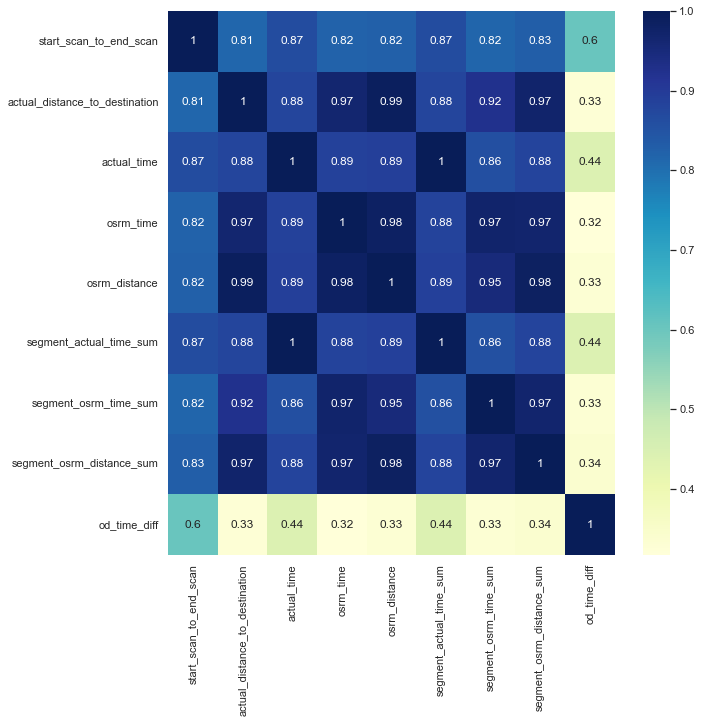

In [67]:
sns.set(rc = {'figure.figsize':(10,10)})
sns.heatmap(trip[numerical_cols].corr(), cmap="YlGnBu", annot=True)

In [68]:
trip[['start_scan_to_end_scan', 'od_time_diff']].corr()

,start_scan_to_end_scan,od_time_diff
start_scan_to_end_scan,1.00000,0.60486
od_time_diff,0.60486,1.00000


<AxesSubplot:>

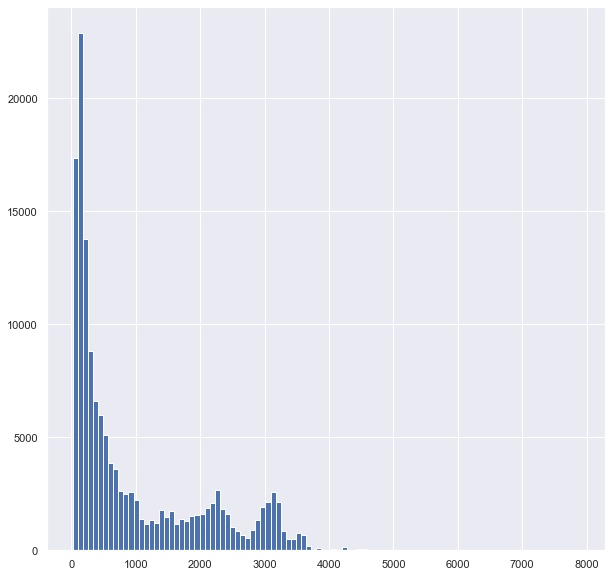

In [69]:
df["start_scan_to_end_scan"].hist(bins=100)

<AxesSubplot:>

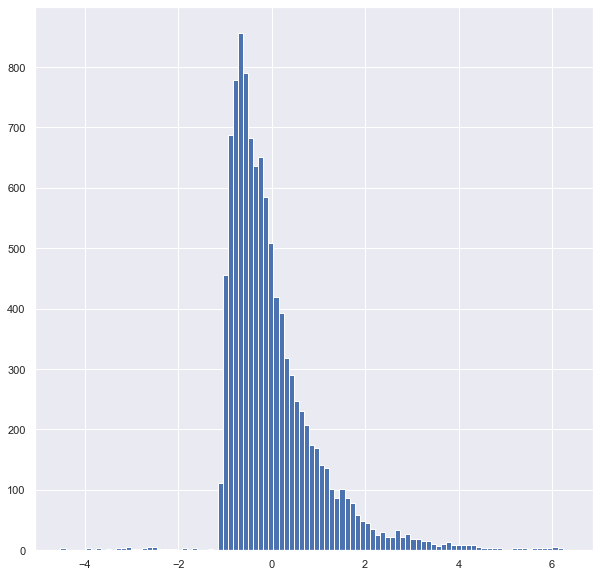

In [70]:
trip["od_time_diff"].hist(bins=100)

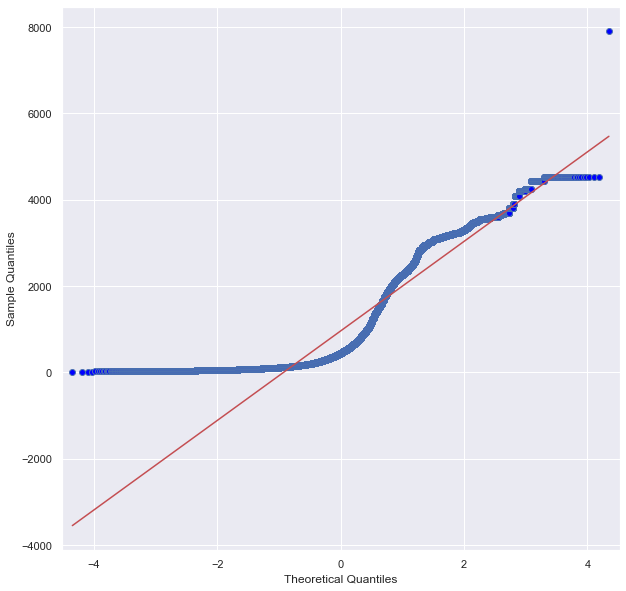

In [71]:
sm.qqplot(df["start_scan_to_end_scan"], line ='s')
py.show()

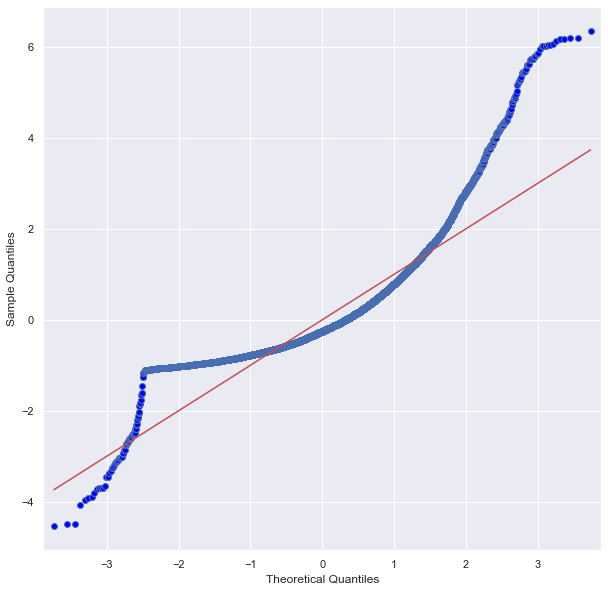

In [72]:
sm.qqplot(trip["od_time_diff"], line ='s')
py.show()

In [73]:
var1 = trip.start_scan_to_end_scan.sample(1000)
var2 = trip.od_time_diff.sample(1000)

In [74]:
f, p = stats.ttest_ind(var1, var2, alternative='two-sided')
print(f, p)

-0.6005843362500483 0.5481849909004831


Inference: pvalue>0.05, so we accepts the ho.

#### 2.c. Do hypothesis testing/ visual analysis between actual_time aggregated value and OSRM time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

Hypothesis Testing: actual_time v/s osrm_time

    ho: actual_time != osrm_time
    ha: actual_time == osrm_time

In [75]:
trip[['actual_time', 'osrm_time']].corr()

,actual_time,osrm_time
actual_time,1.000000,0.886344
osrm_time,0.886344,1.000000


<AxesSubplot:>

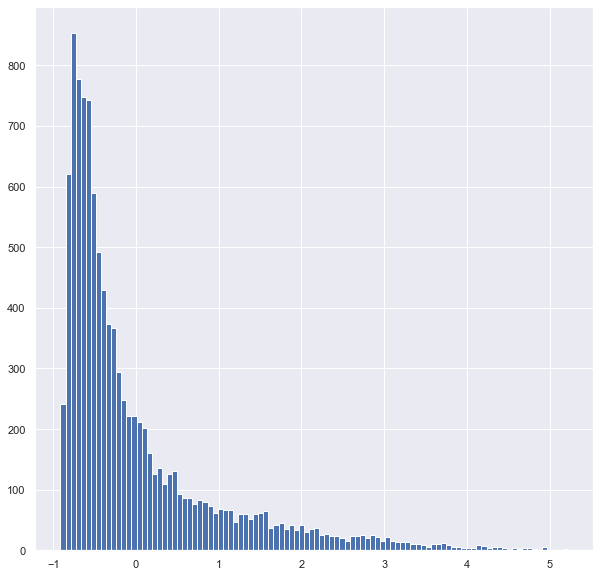

In [76]:
trip["actual_time"].hist(bins=100)

<AxesSubplot:>

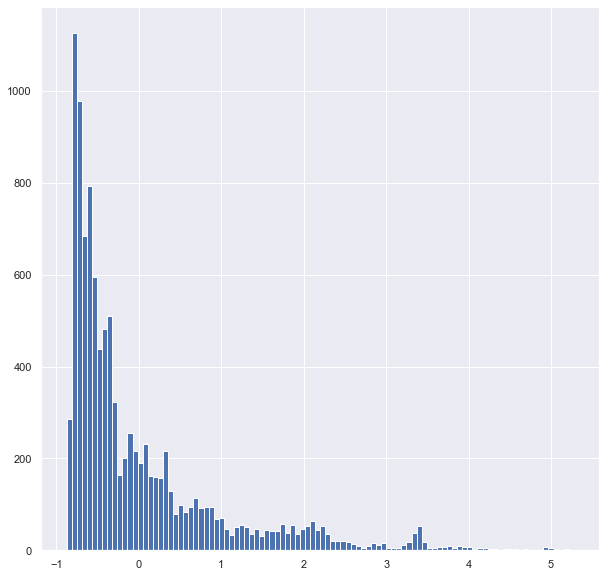

In [77]:
trip["osrm_time"].hist(bins=100)

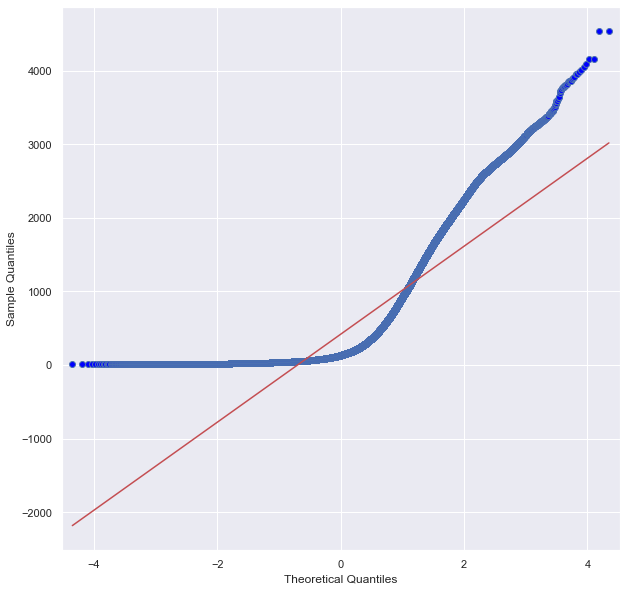

In [78]:
sm.qqplot(df["actual_time"], line ='s')
py.show()

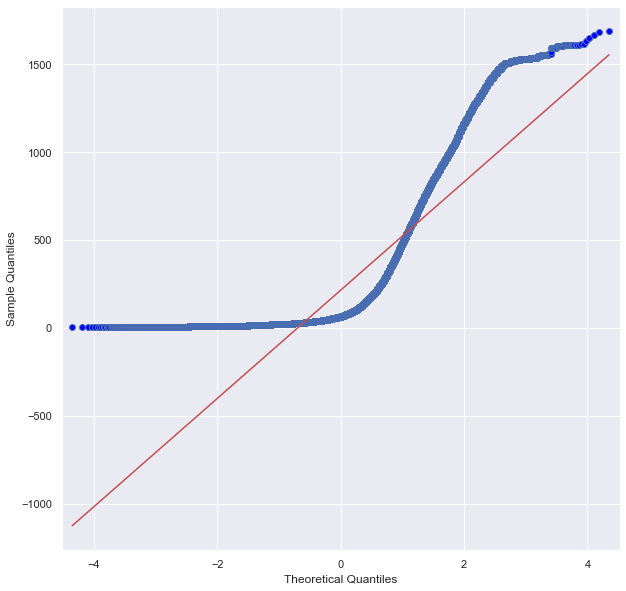

In [79]:
sm.qqplot(df["osrm_time"], line ='s')
py.show()

In [80]:
var1 = trip.actual_time.sample(1000)
var2 = trip.osrm_time.sample(1000)
f, p = stats.ttest_ind(var1, var2, alternative='two-sided')
print(f, p)

-0.5047130881826578 0.6138160256512971


Inference: pvalue>0.05, so we accept the ho.

#### 2.d. Do hypothesis testing/ visual analysis between actual_time aggregated value and segment actual time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

Hypothesis Testing: actual_time v/s segment_actual_time

    ho: actual_time != segment_actual_time
    ha: actual_time == segment_actual_time

In [81]:
trip[['actual_time', 'segment_actual_time_sum']].corr()

,actual_time,segment_actual_time_sum
actual_time,1.000000,0.999932
segment_actual_time_sum,0.999932,1.000000


<AxesSubplot:>

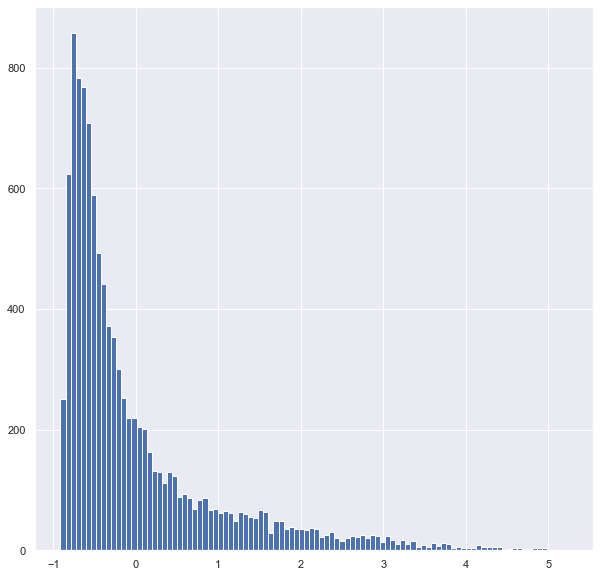

In [82]:
trip["segment_actual_time_sum"].hist(bins=100)

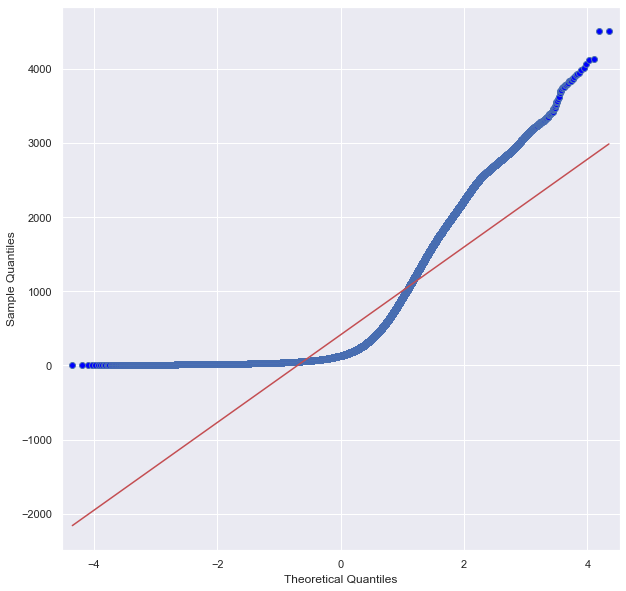

In [83]:
sm.qqplot(df["segment_actual_time_sum"], line ='s')
py.show()

In [84]:
var1 = trip.actual_time.sample(1000)
var2 = trip.segment_actual_time_sum.sample(1000)
f, p = stats.ttest_ind(var1, var2, alternative='two-sided')
print(f, p)

-2.2784913478192315 0.022802442911417916


Inference: pvalue>0.05, so  we accept the ho.

#### 2.e. Do hypothesis testing/ visual analysis between osrm distance aggregated value and segment osrm distance aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

Hypothesis Testing: osrm_distance v/s segment_osrm_distance

    ho: osrm_distance != segment_osrm_distance
    ha: osrm_distance == segment_osrm_distance

In [85]:
trip[['osrm_distance', 'segment_osrm_distance_sum']].corr()

,osrm_distance,segment_osrm_distance_sum
osrm_distance,1.000000,0.984596
segment_osrm_distance_sum,0.984596,1.000000


<AxesSubplot:>

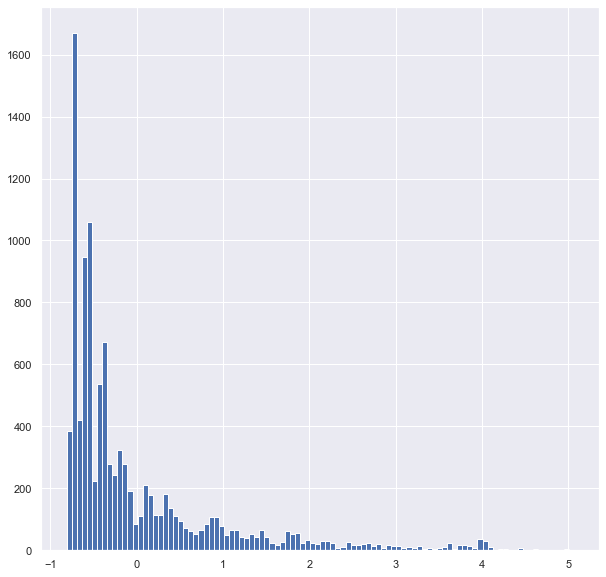

In [86]:
trip["osrm_distance"].hist(bins=100)

<AxesSubplot:>

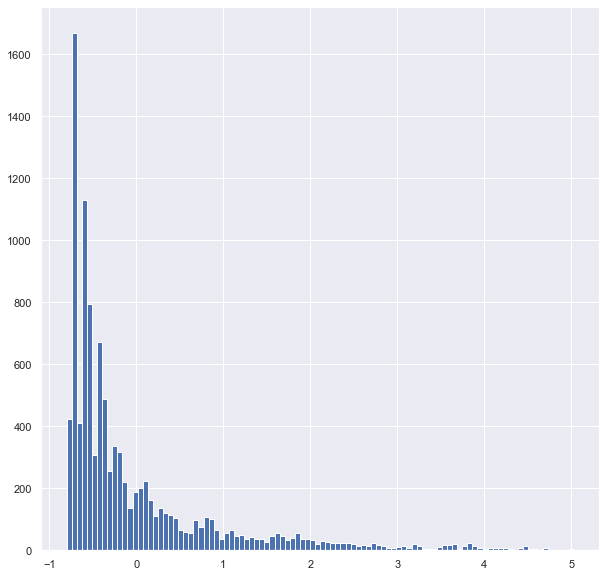

In [87]:
trip["segment_osrm_distance_sum"].hist(bins=100)

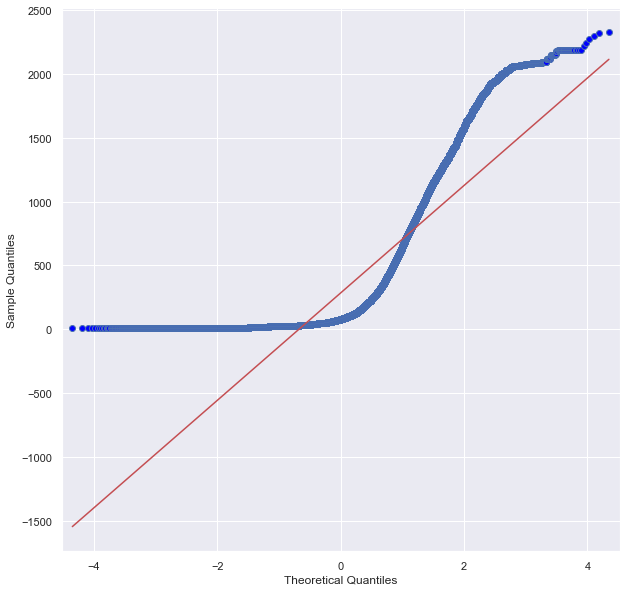

In [88]:
sm.qqplot(df["osrm_distance"], line ='s')
py.show()

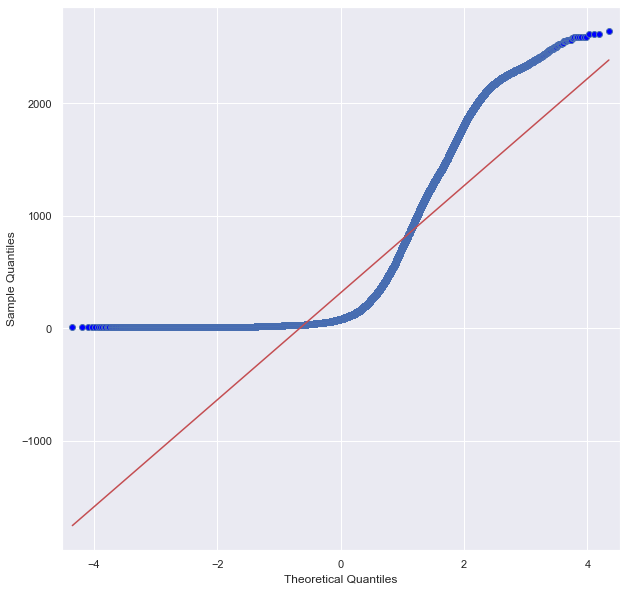

In [89]:
sm.qqplot(df["segment_osrm_distance_sum"], line ='s')
py.show()

In [90]:
var1 = trip.osrm_distance.sample(1000)
var2 = trip.segment_osrm_distance_sum.sample(1000)
f, p = stats.ttest_ind(var1, var2, alternative='two-sided')
print(f, p)

-0.047937294574998776 0.9617710077990738


Inference: pvalue>0.05, so we accespt the ho.

#### 2.f. Do hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

Hypothesis Testing: osrm_time v/s segment_osrm_time

    ho: osrm_time != segment_osrm_time
    ha: osrm_time == segment_osrm_time

In [91]:
trip[['osrm_time', 'segment_osrm_time_sum']].corr()

,osrm_time,segment_osrm_time_sum
osrm_time,1.000000,0.972809
segment_osrm_time_sum,0.972809,1.000000


<AxesSubplot:>

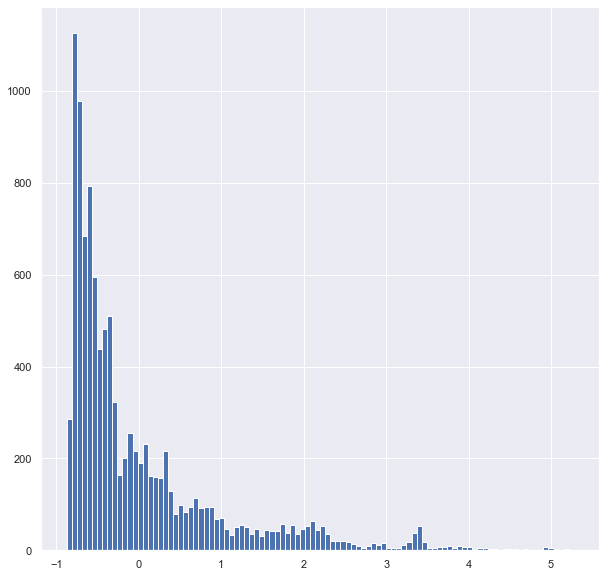

In [92]:
trip["osrm_time"].hist(bins=100)

<AxesSubplot:>

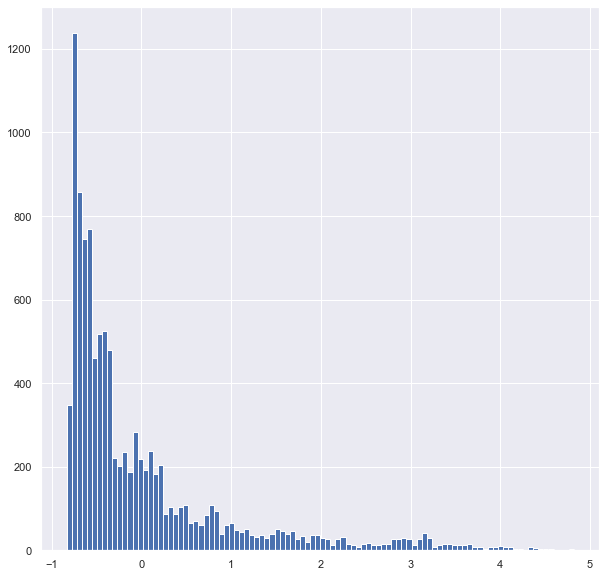

In [93]:
trip["segment_osrm_time_sum"].hist(bins=100)

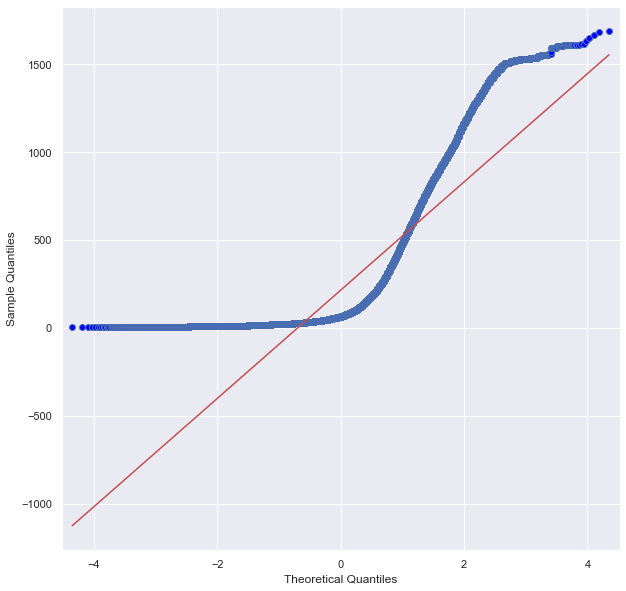

In [94]:
sm.qqplot(df["osrm_time"], line ='s')
py.show()

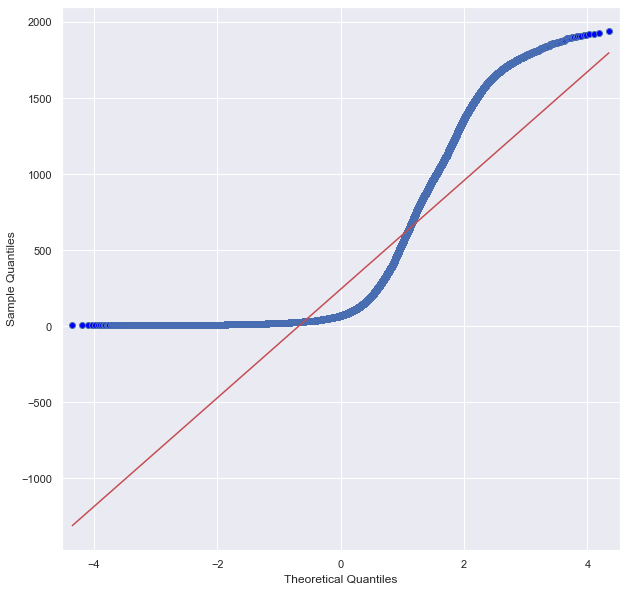

In [95]:
sm.qqplot(df["segment_osrm_time_sum"], line ='s')
py.show()

In [96]:
var1 = trip.osrm_time.sample(1000)
var2 = trip.segment_osrm_time_sum.sample(1000)
f, p = stats.ttest_ind(var1, var2, alternative='two-sided')
print(f, p)

-0.04470745136059461 0.9643449618721716


Inference: pvalue> 0.05, so we accepts the ho.